In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, r2_score
from sklearn import metrics

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.shape

(301, 9)

In [4]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
print(data['Fuel_Type'].value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [10]:
data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}}, inplace=True)
data.replace({'Transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)

/var/folders/0t/tlg8p4n91y1g2zyg12tmx_n00000gn/T/ipykernel_10674/156655424.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
/var/folders/0t/tlg8p4n91y1g2zyg12tmx_n00000gn/T/ipykernel_10674/156655424.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}}, inplace=True)
/var/folders/0t/tlg8p4n91y1g2zyg12tmx_n00000gn/T/ipykernel_10674/156655424.py:3: FutureWarning: Downcasting behavior in `replace

In [11]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: xlabel='Year', ylabel='Selling_Price'>

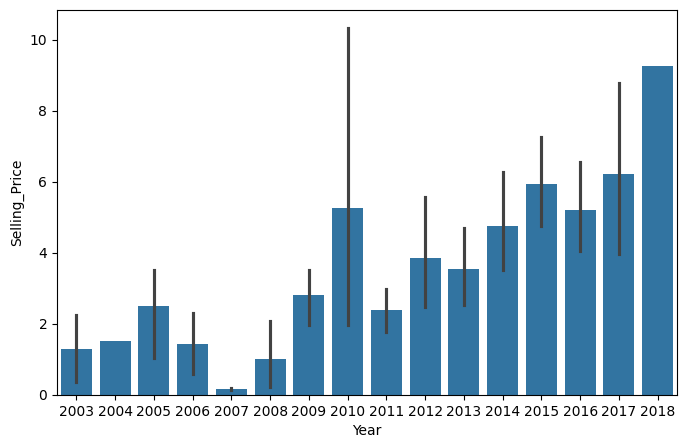

In [15]:
plot = plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Selling_Price', data=data)

In [17]:
X = data.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1)

In [19]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(270, 7) (31, 7)
(270,) (31,)


In [20]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
train_pred = reg_model.predict(X_train)
test_pred = reg_model.predict(X_test)

In [33]:
error = metrics.r2_score(y_train, train_pred)
print(error)

0.8886588257606458


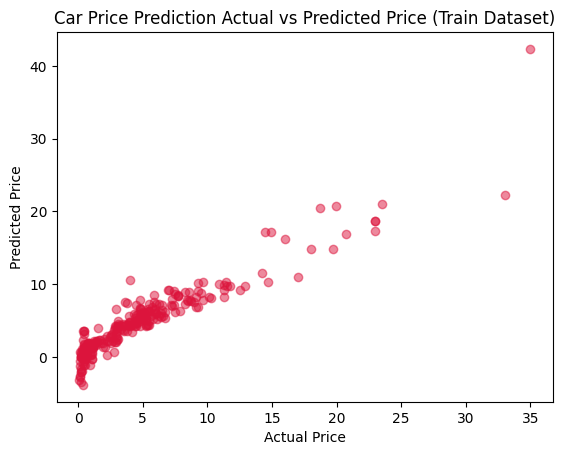

In [41]:
plt.scatter(y_train, train_pred, c='crimson', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Car Price Prediction Actual vs Predicted Price (Train Dataset)")
plt.show()

In [42]:
error_test = metrics.r2_score(y_test, test_pred)
print(error_test)

0.3931106765722229


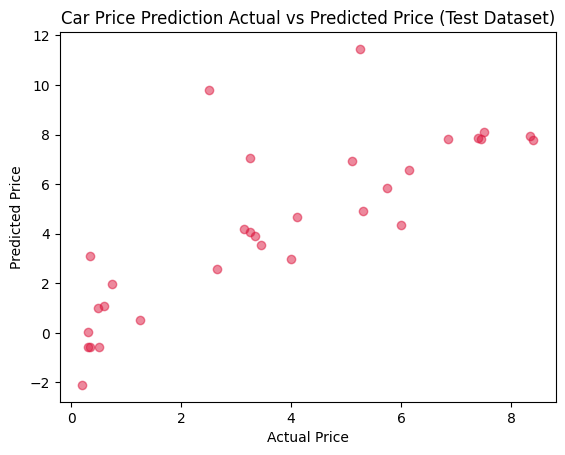

In [43]:
plt.scatter(y_test, test_pred, c='crimson', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Car Price Prediction Actual vs Predicted Price (Test Dataset)")
plt.show()

In [ ]:
#Lasso

In [44]:
model = Lasso()
model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [46]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [47]:
error = metrics.r2_score(y_train, train_pred)
print(error)

0.8534437888277806
